# =========================Libraries ============================

In [1]:
import gym 
import itertools 
import matplotlib 
import matplotlib.style 
import numpy as np 
import pandas as pd 
import sys

from collections import defaultdict 
from windy_gridworld import WindyGridworldEnv 
import plotting 
  
matplotlib.style.use('ggplot')

# ======================== Parameters ==========================

In [ ]:
num_episodes    = 1000
discount_factor = 1.0
alpha           = 0.6
epsilon         = 0.1

# ========================= Function ==========================

In [2]:
def createEpsilonGreedyPolicy(Q, epsilon, num_actions): 
    """ 
    Creates an epsilon-greedy policy based 
    on a given Q-function and epsilon. 
       
    Returns a function that takes the state 
    as an input and returns the probabilities 
    for each action in the form of a numpy array  
    of length of the action space(set of possible actions). 
    """
    def policyFunction(state): 
   
        Action_probabilities = np.ones(num_actions, 
                dtype = float) * epsilon / num_actions 
                  
        best_action = np.argmax(Q[state]) 
        Action_probabilities[best_action] += (1.0 - epsilon) 
        return Action_probabilities 
   
    return policyFunction

In [25]:
def qLearning(env, num_episodes, discount_factor = 1.0, 
                            alpha = 0.6, epsilon = 0.1): 
    """ 
    Q-Learning algorithm: Off-policy TD control. 
    Finds the optimal greedy policy while improving 
    following an epsilon-greedy policy"""
       
    # Action value function 
    # A nested dictionary that maps 
    # state -> (action -> action-value). 
    Q = defaultdict(lambda: np.zeros(env.action_space.n)) 
   
    # Keeps track of useful statistics 
    stats = plotting.EpisodeStats( 
        episode_lengths = np.zeros(num_episodes), 
        episode_rewards = np.zeros(num_episodes))     
       
    # Create an epsilon greedy policy function 
    # appropriately for environment action space 
    policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n) 
       
    # For every episode 
    for ith_episode in range(num_episodes): 
           
        # Reset the environment and pick the first action 
        state = env.reset() 
           
        for t in itertools.count(): 
               
            # get probabilities of all actions from current state 
            action_probabilities = policy(state) 
   
            # choose action according to  
            # the probability distribution 
            action = np.random.choice(np.arange( len(action_probabilities)), p = action_probabilities) 
            
            # take action and get reward, transit to next state 
            next_state, reward, done, _ = env.step(action) 
            
            # Update statistics 
            stats.episode_rewards[ith_episode] += reward 
            stats.episode_lengths[ith_episode] = t 
               
            # TD Update 
            best_next_action = np.argmax(Q[next_state])     
            td_target        = reward + discount_factor * Q[next_state][best_next_action] 
            td_delta         = td_target - Q[state][action] 
            Q[state][action] += alpha * td_delta 
   
            # done is True if episode terminated    
            if done: 
                break
                   
            state = next_state 
       
    return Q, stats 

# ========================= Train the model =====================

In [26]:
env = WindyGridworldEnv() 

In [27]:
Q, stats = qLearning(env, 1000) 

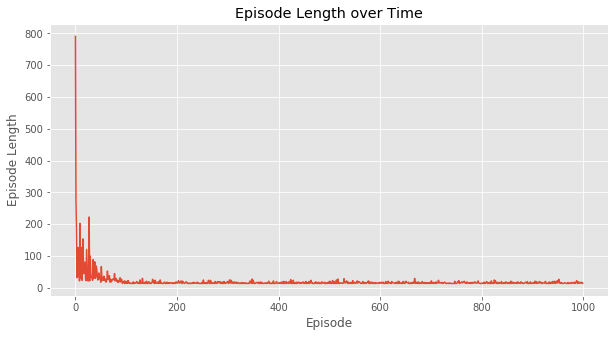

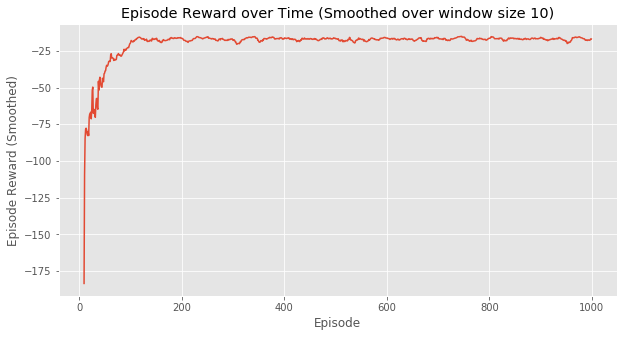

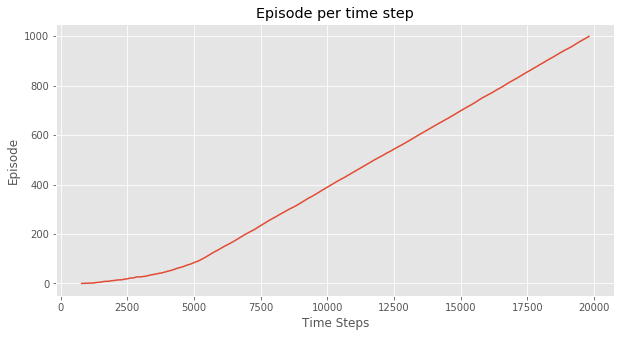

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [28]:
plotting.plot_episode_stats(stats)

In [29]:
Q

defaultdict(<function __main__.qLearning.<locals>.<lambda>()>,
            {30: array([-15.99996489, -15.        , -15.99941509, -15.99999999]),
             20: array([-15.20358508, -14.99999849, -15.3072889 , -15.48326007]),
             10: array([-14.78110983, -14.58898593, -15.34722162, -15.12605694]),
             0: array([-14.28673395, -14.12851743, -14.87195006, -14.09921054]),
             1: array([-13.75422671, -13.69189837, -14.22883739, -14.01299762]),
             2: array([-13.31860223, -12.9052508 , -13.53251271, -13.57078077]),
             3: array([-12.83398602, -11.99999991, -12.40017339, -12.46685728]),
             4: array([-11.92723789, -11.        , -11.94090339, -12.97388606]),
             5: array([-10.99862286, -10.        , -10.99752518, -11.95671756]),
             6: array([-10.,  -9., -10., -11.]),
             7: array([ -8.99999999,  -8.        ,  -9.        , -10.        ]),
             8: array([-7.99999999, -7.        , -8.        , -8.99999999])